In [1]:
import qpcr
import qpcr.Analysis as qA


==== ops.biotools.qpcr Module ====

For additional information about how to use this module and its functions
please, call:

    qpcr.help()
    qpcr.Info()
    qpcr.Example()

    or

    qpcr.Analysis.help()
    qpcr.Analysis.Info()
    qpcr.Analysis.Example()






## `qpcr.Analysis.delta_deltaCt` using two assays and one normaliser

Exported DeltaDelta_Ct analysis to:
Example Data/HNRNPL_nmd_DeltaDelta_Ct.csv
Exported DeltaDelta_Ct analysis to:
Example Data/HNRNPL_prot_DeltaDelta_Ct.csv
Creating a 1x2 Layout
0 0
0 1


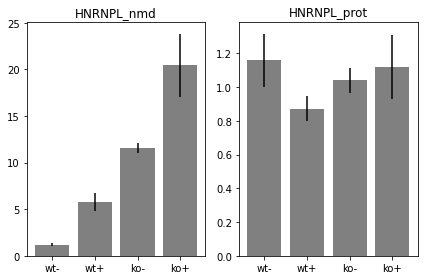

In [9]:
hnrnpl_nmd = "Example Data/HNRNPL_nmd.csv"
hnrnpl_prot = "Example Data/HNRNPL_prot.csv"
s28 = "Example Data/28S.csv"

groups = ["wt-", "wt+", "ko-", "ko+"]
res = qA.delta_deltaCt([s28, hnrnpl_nmd, hnrnpl_prot], 
                        replicates=6, normaliser="28S", #A
                        anchor="first", group_names=groups)

qA.preview_results(res)

#A  --  the normaliser="28S" can be used because the file s28 will be pre-processed along with the other assays. As no specific assay names are provided,
#       the package will use the filenames (without suffix) as key.


## `qpcr` manual DeltaDelta CT analysis of HNRNPL_nmd using 28S as normaliser

Creating a 1x1 Layout
0 0


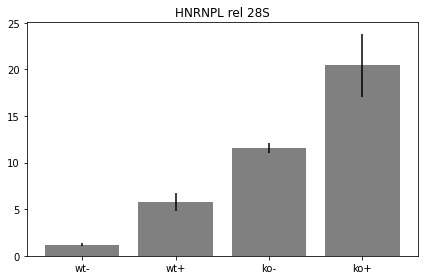

In [15]:
hnrnpl_nmd = "Example Data/HNRNPL_nmd.csv"
s28 = "Example Data/28S.csv"

# first we load the files
hnrnpl_nmd = qpcr.open_csv_file(hnrnpl_nmd)
s28 = qpcr.open_csv_file(s28)

# first we group the dataset into groups of 6-replicates each
reps = 6
hnrnpl_nmd = qpcr.group_samples(hnrnpl_nmd, replicates=reps)
s28 = qpcr.group_samples(s28, replicates=reps)

# now we rename the groups to suit our conditions
groups = ["wt-", "wt+", "ko-", "ko+"]
hnrnpl_nmd = qpcr.rename_groups(hnrnpl_nmd, groups)
s28 = qpcr.rename_groups(s28, groups)

# now we are good to go to perform the first Delta-Ct 
anchor = "first"
hnrnpl_nmd = qpcr.Delta_Ct(hnrnpl_nmd, anchor=anchor)
s28 = qpcr.Delta_Ct(s28, anchor=anchor)

# and now we can perform the second Delta-Ct by normalising HNRNPL against 28S
result = qpcr.normalise(sample=hnrnpl_nmd, normaliser=s28)

# and preview again using qA.preview_results
qA.preview_results({"HNRNPL rel 28S" : result}) #B

#B  -- notice how the result is now encased within a larger dictionary (this is because preview_results is intended 
#      to display more than one set of results and therefore expects more than one presented in a dictionary).

## Using combined normalisers

Exported DeltaDelta_Ct analysis to:
Example Data/NMD_DeltaDelta_Ct.csv
Exported DeltaDelta_Ct analysis to:
Example Data/Prot_DeltaDelta_Ct.csv
Creating a 1x2 Layout
0 0
0 1


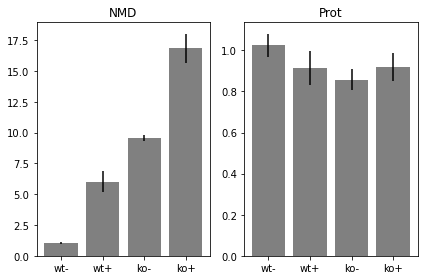

In [25]:
hnrnpl_nmd = "Example Data/HNRNPL_nmd.csv"
hnrnpl_prot = "Example Data/HNRNPL_prot.csv"
s28 = "Example Data/28S.csv"
actin = "Example Data/actin.csv"

# first we define the general properties of the experiment
reps = 6
groups = ["wt-", "wt+", "ko-", "ko+"]
names = ["Actin", "28S", "NMD", "Prot"]
anchor = "first"

# now we can start combining the normalisers Actin and 28S
combined_normalisers = qpcr.preprocess_normalisers([actin, s28], 
                                                    replicates=reps, 
                                                    group_names=groups, 
                                                    run_names = names[0:2],
                                                    anchor=anchor)
combined_normalisers = qpcr.combine_normalisers(combined_normalisers)

# now that the normalisers are combined, we can perform DeltaDelta CT analysis as we wish -- here we do it using the qA.delta_deltaCt function
result = qA.delta_deltaCt([hnrnpl_nmd, hnrnpl_prot], 
                        replicates=reps, normaliser=combined_normalisers, 
                        anchor=anchor, group_names=groups, run_names = names[2:])

qA.preview_results(result)
